## TOC:
- [1. Autoregressive Model](#ar)
    - [1.1 Exploring FTSE Stock market behaviour](#ftse)
    - [1.2 Fitting an AR Model](#ar1)
    - [1.3 Complex AR Model and Log-Likelihood Ratio test](#artest)
- [2. Non-Stationary Process](#nonstat)
    - [2.1 Dickey-Fuller Test](#dftest)

# Autoregressive Model (AR)  <a class="anchor" id="ar"></a>
---

In time series we often found correlation between past and present values.

AR model relies on past periods and values to predict current period values. It is a Linear model where current period values are a sum of past outcoms multiplied by a numeric factor.
$$x_t = C + \varphi \times x_{t-1} + \varepsilon_t$$
where 
- $-1 < \varphi < 1$
- $\varepsilon_t$ represents the residual (**difference** between our prediction and the correct value)

***Values at a given period are equal to some portion of prices in the last periods plus some benchmark and unpredictable shocks***

We need to determine the number of lags to take into account, so the ar model depends on the number of lags as follows.
$$
AR(n) = x_t = C + \sum _{i=1} ^n \varphi_i \times x_{t-i} + \varepsilon_t
$$

## Imports and dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set_theme(rc={"font.size": 23, "axes.titlesize": 23, "axes.labelsize": 22,
                  'xtick.labelsize': 15, 'ytick.labelsize': 15,})

In [4]:
# Now working with ftse
# Loading
directory = "C:/Users/42111/Desktop/DataScience/analysis/archive/dataScience365/3_1_index2018/Index2018.csv"
raw_data = pd.read_csv(directory).copy()

# Keep just dax stock market
ftse_df = raw_data.copy()[['ftse', 'date']]

# Transforming to datetime as index with b freq
ftse_df['date'] = pd.to_datetime(ftse_df['date'], dayfirst=True)
ftse_df.set_index('date', inplace=True)
ftse_df = ftse_df.asfreq('b')

# Fill na's with last valid observation before the nan
ftse_df = ftse_df.fillna(method='ffill')
ftse_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6277 entries, 1994-01-07 to 2018-01-29
Freq: B
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ftse    6277 non-null   float64
dtypes: float64(1)
memory usage: 98.1 KB


In [5]:
size = int(len(ftse_df) * 0.8) # To separate 80% of the data
df_train, df_test = ftse_df.iloc[:size].copy(), ftse_df.iloc[size:].copy()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5021 entries, 1994-01-07 to 2013-04-05
Freq: B
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ftse    5021 non-null   float64
dtypes: float64(1)
memory usage: 78.5 KB


## ACF and PACF for FTSE Stock market <a class="anchor" id="ftse"></a>

(-0.3, 1.1)

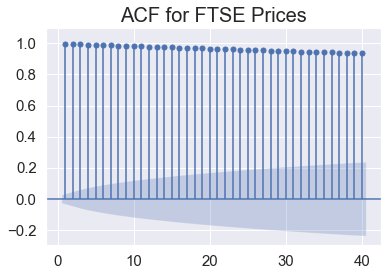

In [9]:
sgt.plot_acf(df_train['ftse'], zero=False, lags=40)
plt.title('ACF for FTSE Prices', size=20)
plt.ylim((-0.3, 1.1))

***Note that we use the PACF to select the lags for our model, since we want to know the direct behaviour of the past tiem series.***

(-0.08, 1.1)

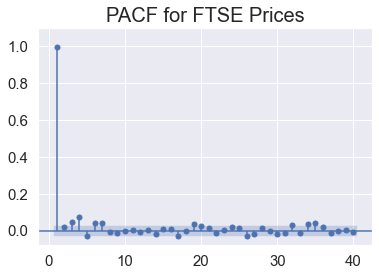

In [14]:
sgt.plot_pacf(df_train['ftse'], zero=False, lags=40, method='ols')
plt.title('PACF for FTSE Prices', size=20)
plt.ylim((-0.08, 1.1))

## Fitting an AR Model <a class="anchor" id="ar1"></a>

Fitting a AR(1) model and not taking any residuals into consideration

In [20]:
from statsmodels.tsa.ar_model import AutoReg
model_ar = AutoReg(df_train['ftse'], lags=1, )
results_ar = model_ar.fit()
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 5021
Model:                     AutoReg(1)   Log Likelihood              -27613.242
Method:               Conditional MLE   S.D. of innovations             59.247
Date:                Wed, 20 Oct 2021   AIC                          55232.483
Time:                        10:38:06   BIC                          55252.047
Sample:                    01-10-1994   HQIC                         55239.338
                         - 04-05-2013                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.8682      4.267      2.312      0.021       1.504      18.232
ftse.L1        0.9982      0.001   1213.963      0.000       0.997       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0018           +0.0000j            1.0018            0.0000
-----------------------------------------------------------------------------
"""

In the mid part we can find coef column, which has the coeficients of our linear model, constant and $\varphi_1$ resprectevely, then the standard errors, how far the predictions are from the true values, then z (test-statistics for significance), then the P values, since both are lesser than 0.5, we can conclude that the constant and lag value are signifcantly different from zero. The last two columns represent the critical values for the 95% confidence interal, ***If 0 is not a part of it, we can say the values are significant***

## Complex AR Model and Log-Likelihood Test <a class="anchor" id="artest"></a>

In [21]:
model_ar2 = AutoReg(df_train['ftse'], lags=2)
results2 = model_ar2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 5021
Model:                     AutoReg(2)   Log Likelihood              -27607.490
Method:               Conditional MLE   S.D. of innovations             59.244
Date:                Wed, 20 Oct 2021   AIC                          55222.980
Time:                        10:59:38   BIC                          55249.064
Sample:                    01-11-1994   HQIC                         55232.120
                         - 04-05-2013                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7554      4.270      2.285      0.022       1.387      18.124
ftse.L1        0.9810      0.014     69.494      0.000       0.953       1.009
ftse.L2        0.0172      0.014      1.216      0.224      -0.010       0.045
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0018           +0.0000j            1.0018            0.0000
AR.2          -58.1505           +0.0000j           58.1505            0.5000
-----------------------------------------------------------------------------
"""

Notice how the P value for $\varphi_2$ is 0.224, since it is greater than 0.05, we can reject the null hypothesis, thus, the coefficient for the second lag ***isn't significantly different than zero***, therefore we assume it is *equal to zero*.

We can interpret the results like that the effects of two time periods ago, are captured in the past period, thus, it doesn't add up any new information.

Checking the behaviour when including more lags can reafirm our conclusion.

In [22]:
model_ar3 = AutoReg(df_train['ftse'], lags=3)
results3 = model_ar3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 5021
Model:                     AutoReg(3)   Log Likelihood              -27596.334
Method:               Conditional MLE   S.D. of innovations             59.177
Date:                Wed, 20 Oct 2021   AIC                          55202.667
Time:                        11:05:49   BIC                          55235.271
Sample:                    01-12-1994   HQIC                         55214.092
                         - 04-05-2013                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4470      4.268      2.214      0.027       1.082      17.812
ftse.L1        0.9802      0.014     69.500      0.000       0.953       1.008
ftse.L2       -0.0309      0.020     -1.563      0.118      -0.070       0.008
ftse.L3        0.0490      0.014      3.473      0.001       0.021       0.077
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0016           -0.0000j            1.0016           -0.0000
AR.2           -0.1857           -4.5108j            4.5147           -0.2565
AR.3           -0.1857           +4.5108j            4.5147            0.2565
-----------------------------------------------------------------------------
"""

In [23]:
model_ar4 = AutoReg(df_train['ftse'], lags=4)
results4 = model_ar4.fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 5021
Model:                     AutoReg(4)   Log Likelihood              -27577.685
Method:               Conditional MLE   S.D. of innovations             59.022
Date:                Wed, 20 Oct 2021   AIC                          55167.369
Time:                        11:06:24   BIC                          55206.493
Sample:                    01-13-1994   HQIC                         55181.079
                         - 04-05-2013                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0195      4.259      2.118      0.034       0.672      17.367
ftse.L1        0.9765      0.014     69.334      0.000       0.949       1.004
ftse.L2       -0.0286      0.020     -1.451      0.147      -0.067       0.010
ftse.L3       -0.0224      0.020     -1.137      0.256      -0.061       0.016
ftse.L4        0.0729      0.014      5.174      0.000       0.045       0.100
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0014           -0.0000j            1.0014           -0.0000
AR.2            0.9539           -2.0872j            2.2949           -0.1818
AR.3            0.9539           +2.0872j            2.2949            0.1818
AR.4           -2.6018           -0.0000j            2.6018           -0.5000
-----------------------------------------------------------------------------
"""

We are interested in greater Log-Likelihood, but smaller criterion values, to determine if we gain any true information we run the Log-Likelihood test.

## Log-Likelihood Test

In [65]:
from scipy.stats.distributions import chi2
def LLR_test(mod1, mod2, DF=1): # Degrees of freedom. Usually compare a single diff.
    L1 = mod1.fit().llf
    L2 = mod2.fit().llf
    LR = (L2 - L1) * 2
    p = chi2.sf(LR, DF).round(5)
    return p

In [66]:
LLR_test(model_ar2, model_ar3)

0.0

Difference between log likelihood is significant, so there's a win using 3 lags.

In [67]:
LLR_test(model_ar2, model_ar4)

0.0

Same, we keep going until the difference is insignificant

In [71]:
past = model_ar4
for n in range(4, 20):
    current = AutoReg(df_train['ftse'], lags=n+1)
    pval = LLR_test(past, current) * 100
    if pval > 0.05: 
        print(f"{n} lags are worth having, with a p value of {pval}")
        break
    past = current
past.fit().summary()

7 lags are worth having, with a p value of 0.11900000000000001


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 5021
Model:                     AutoReg(7)   Log Likelihood              -27551.793
Method:               Conditional MLE   S.D. of innovations             58.911
Date:                Wed, 20 Oct 2021   AIC                          55121.586
Time:                        11:44:32   BIC                          55180.266
Sample:                    01-18-1994   HQIC                         55142.150
                         - 04-05-2013                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6519      4.258      2.032      0.042       0.306      16.998
ftse.L1        0.9781      0.014     69.304      0.000       0.950       1.006
ftse.L2       -0.0302      0.020     -1.532      0.126      -0.069       0.008
ftse.L3       -0.0267      0.020     -1.355      0.175      -0.065       0.012
ftse.L4        0.1038      0.020      5.276      0.000       0.065       0.142
ftse.L5       -0.0668      0.020     -3.385      0.001      -0.105      -0.028
ftse.L6       -0.0025      0.020     -0.129      0.898      -0.041       0.036
ftse.L7        0.0428      0.014      3.035      0.002       0.015       0.071
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0013           -0.0000j            1.0013           -0.0000
AR.2            1.3289           -0.9292j            1.6215           -0.0971
AR.3            1.3289           +0.9292j            1.6215            0.0971
AR.4           -0.0402           -1.5862j            1.5867           -0.2540
AR.5           -0.0402           +1.5862j            1.5867            0.2540
AR.6           -1.7597           -0.6517j            1.8765           -0.4436
AR.7           -1.7597           +0.6517j            1.8765            0.4436
-----------------------------------------------------------------------------
"""

In [73]:
# comparing to AR1 model
LLR_test(model_ar, current, DF=6)

0.0

# Using Stationary Values <a class='anchor' id='nonstat'></a>
---

## DickeyFuller-Test <a class='anchor' id='dftest'></a>

In [74]:
sts.adfuller(df_train['ftse'])

(-1.904155141883686,
 0.3301089327702835,
 6,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54854.15304507557)

p value is 0.3301, so we can't say that the data comes from a stationary process, so we shouldn't rely on AR models to make accurate forecast.

#### We'll transform the dataset so that it fits stationary assumptions.

Returns express the percentage change between the values of two consecutive periods.

### Returns

In [77]:
df_train['returns'] = df_train['ftse'].pct_change(1) * 100

In [78]:
df_train.head()

,ftse,returns
date,,
1994-01-07,3445.98,NaN
1994-01-10,3440.58,-0.156704
1994-01-11,3413.77,-0.779229
1994-01-12,3372.02,-1.222988
1994-01-13,3360.01,-0.356166


In [80]:
sts.adfuller(df_train['returns'][1:])

(-12.77026571949726,
 7.798058336037375e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 15696.767245697501)

The 1 percent index is far greater than the p value, thus we can say that our returns are indeed a stationary process.

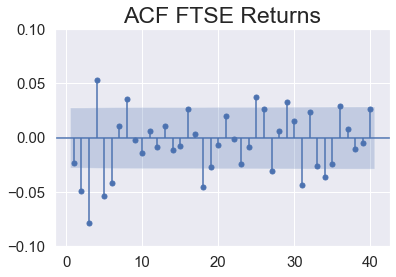

In [86]:
sgt.plot_acf(df_train['returns'][1:], lags=40, zero=False)
plt.title('ACF FTSE Returns')
plt.ylim((-0.1,0.1))
plt.show()

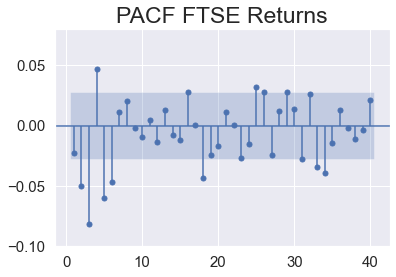

In [91]:
sgt.plot_pacf(df_train['returns'][1:], lags=40, zero=False, method='ols')
plt.title('PACF FTSE Returns')
plt.ylim((-0.1,0.08))
plt.show()

PACF looks very similar to ACF! This can be interpreted as the prices today often move to the oposite direction from prices yesterday. 